Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [6]:
!pip install pymystem3


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import re

In [8]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [12]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [13]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [14]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [15]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [16]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [17]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [18]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [19]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [20]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [21]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [22]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [23]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [24]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [25]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [26]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [27]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [28]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [29]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [30]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [31]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [32]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [33]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus[0m

  Searched in:
    - 'C:\\Users\\Анна/nltk_data'
    - 'c:\\Users\\Анна\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\Анна\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\Анна\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Анна\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [34]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [35]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

FileNotFoundError: [Errno 2] No such file or directory: 'text_morph.txt'

In [36]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

NameError: name 'txt' is not defined

Сколько у нас частей речи определенного вида?

In [37]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

NameError: name 'resulting_text' is not defined

In [38]:
from nltk import FreqDist

In [39]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [41]:
stop_words = set(stopwords.words("english"))

In [42]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

NameError: name 'tokenized_txt' is not defined

In [43]:
frequency_distribution_1.plot(30, cumulative=False)

NameError: name 'frequency_distribution_1' is not defined

Повторим то же самое, только с учётом частеречных тэгов:

In [44]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


NameError: name 'tokenized_txt' is not defined

In [45]:
frequency_distribution_2.plot(30, cumulative=False)

NameError: name 'frequency_distribution_2' is not defined

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

Длина английского текста: 4410 символов
Длина русского текста: 5712 символов


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Анна\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


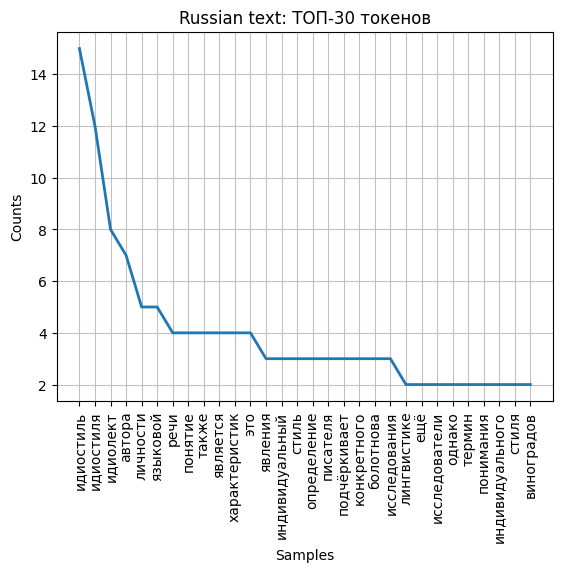

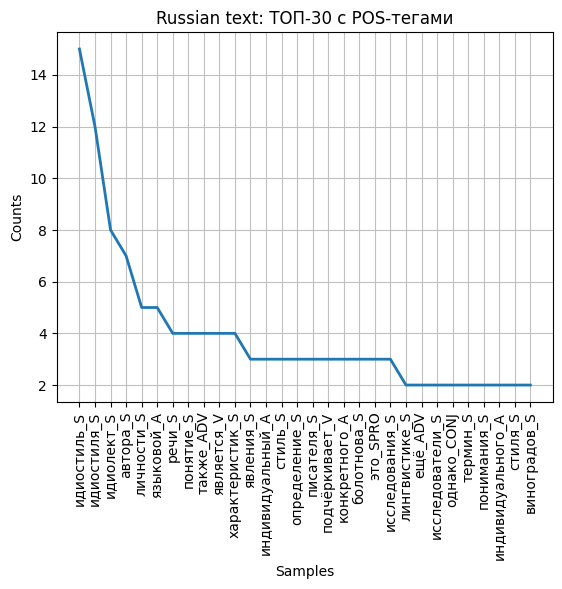

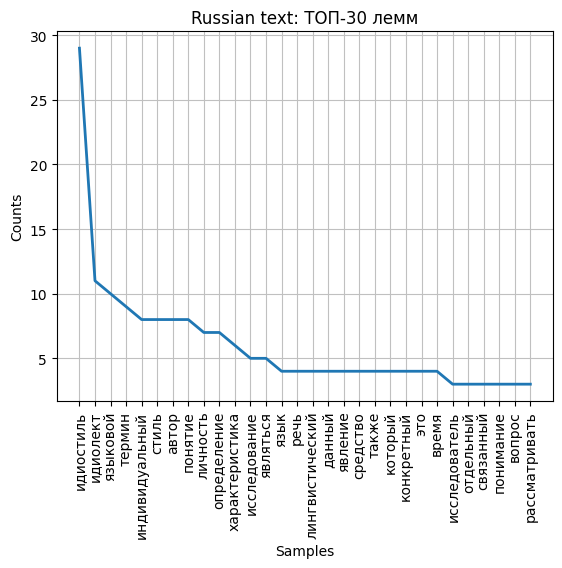

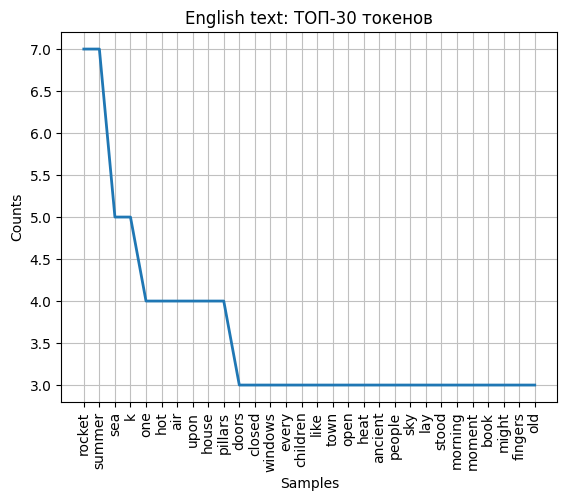

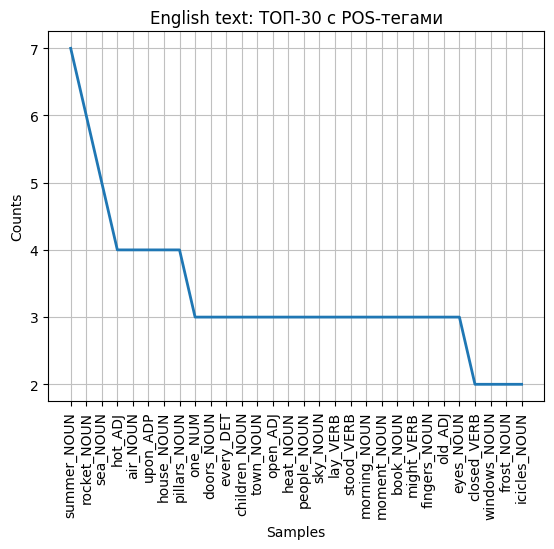

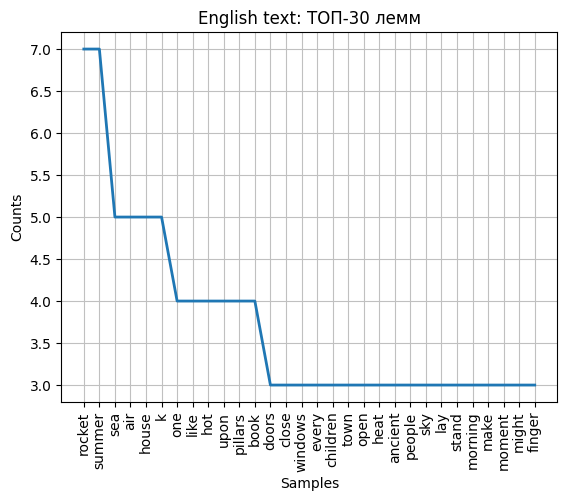


 RUSSIAN TOP-30
Tokens: [('идиостиль', 15), ('идиостиля', 12), ('идиолект', 8), ('автора', 7), ('личности', 5), ('языковой', 5), ('речи', 4), ('понятие', 4), ('также', 4), ('является', 4), ('характеристик', 4), ('это', 4), ('явления', 3), ('индивидуальный', 3), ('стиль', 3), ('определение', 3), ('писателя', 3), ('подчёркивает', 3), ('конкретного', 3), ('болотнова', 3), ('исследования', 3), ('лингвистике', 2), ('ещё', 2), ('исследователи', 2), ('однако', 2), ('термин', 2), ('понимания', 2), ('индивидуального', 2), ('стиля', 2), ('виноградов', 2)]
POS: [('идиостиль_S', 15), ('идиостиля_S', 12), ('идиолект_S', 8), ('автора_S', 7), ('личности_S', 5), ('языковой_A', 5), ('речи_S', 4), ('понятие_S', 4), ('также_ADV', 4), ('является_V', 4), ('характеристик_S', 4), ('явления_S', 3), ('индивидуальный_A', 3), ('стиль_S', 3), ('определение_S', 3), ('писателя_S', 3), ('подчёркивает_V', 3), ('конкретного_A', 3), ('болотнова_S', 3), ('это_SPRO', 3), ('исследования_S', 3), ('лингвистике_S', 2), ('ещ

In [52]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
nltk.download("stopwords")
nltk.download("wordnet")

m = Mystem()
wnl = WordNetLemmatizer()

def get_russian_pos(tokens):
    analyzed = m.analyze(" ".join(tokens))
    result = []
    for item in analyzed:
        if 'analysis' in item and item['analysis']:
            token = item['text'].lower().strip()
            if not token or not re.fullmatch(r"[а-яё]+", token):
                continue
            gr = item['analysis'][0].get("gr", "")
            pos = gr.split(',')[0].split('=')[0]
            result.append(f"{token}_{pos}")
    return result

def analyze_text(text, lang="eng", title="Text"):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if re.fullmatch(r"[a-zA-Zа-яА-ЯёЁ]+", t)]
    stop_words = set(stopwords.words("english" if lang=="eng" else "russian"))
    tokens = [t for t in tokens if t not in stop_words]
    fdist_tokens = FreqDist(tokens)
    fdist_tokens.plot(30, title=f"{title}: ТОП-30 токенов")
    plt.show()

    if lang == "eng":
        tagged = nltk.pos_tag(tokens, tagset="universal")
        tagged = ["_".join(t) for t in tagged]
    else:
        tagged = get_russian_pos(tokens)

    fdist_pos = FreqDist(tagged)
    fdist_pos.plot(30, title=f"{title}: ТОП-30 с POS-тегами")
    plt.show()

    if lang == "rus":
        lemmas = [
            l for l in m.lemmatize(" ".join(tokens))
            if re.fullmatch(r"[а-яё]+", l)
        ]
    else:
        lemmas = [wnl.lemmatize(t, pos='v') for t in tokens]

    fdist_lemmas = FreqDist(lemmas)
    fdist_lemmas.plot(30, title=f"{title}: ТОП-30 лемм")
    plt.show()

    return {
        "tokens": fdist_tokens.most_common(30),
        "pos": fdist_pos.most_common(30),
        "lemmas": fdist_lemmas.most_common(30)
    }

eng_text = """January 1999: ROCKET SUMMER
One minute it was Ohio winter, with doors closed, windows locked, the panes blind with frost, icicles fringing every roof, children skiing on slopes, housewives lumbering like great black bears in their furs along the icy streets.
And then a long wave of warmth crossed the small town. A flooding sea of hot air; it seemed as if someone had left a bakery door open. The heat pulsed among the cottages and bushes and children. The icicles dropped, shattering, to melt. The doors flew open. The windows flew up. The children worked off their wool clothes. The housewives shed their bear disguises. The snow dissolved and showed last summer’s ancient green lawns.
Rocket summer. The words passed among the people in the open, airing houses. Rocket summer. The warm desert air changing the frost patterns on the windows, erasing the art work. The skis and sleds suddenly useless. The snow, falling from the cold sky upon the town, turned to a hot rain before it touched the ground.
Rocket summer. People leaned from their dripping porches and watched the reddening sky.
The rocket lay on the launching field, blowing out pink clouds of fire and oven heat. The rocket stood in the cold wintar morning, making summer with every breath of its mighty exhausts. The rocket made climates, and summer lay for a brief moment upon the land…
February 1999: YLLA
They had a house of crystal pillars on the planet Mars by the edge of an empty sea, and every morning you could see Mrs. K eating the golden fruits that grew from the crystal walls, or cleaning the house with handfuls of magnetic dust which, taking all dirt with it, blew away on the hot wind. Afternoons, when the fossil sea was warm and motionless, and the wine trees stood stiff in the yard, and the little distant Martian bone town was all enclosed, and no one drifted out their doors, you could see Mr. K himself in his room, reading from a metal book with raised hieroglyphs over which he brushed his hand, as one might play a harp. And from the book, as his fingers stroked, a voice sang, a soft ancient voice, which told tales of when the sea was red steam on the shore and ancient men had carried clouds of metal insects and electric spiders into battle.
Mr. and Mrs. K had lived by the dead sea for twenty years, and their ancestors had lived in the same house, which turned and followed the sun, flower-like, for ten centuries.
Mr. and Mrs. K were not old. They had the fair, brownish skin of the true Martian, the yellow coin eyes, the soft musical voices. Once they had liked painting pictures with chemical fire, swimming in the canals in the seasons when the wine trees filled them with green liquors, and talking into the dawn together by the blue phosphorous portraits in the speaking room.
They were not happy now.
This morning Mrs. K stood between the pillars, listening to the desert sands heat, melt into yellow wax, and seemingly run on the horizon.
Something was going to happen.
She waited.
She watched the blue sky of Mars as if it might at any moment grip in on itself, contract, and expel a shining miracle down upon the sand.
Nothing happened.
Tired of waiting, she walked through the misting pillars. A gentle rain sprang from the fluted pillar tops, cooling the scorched air, falling gently on her. On hot days it was like walking in a creek. The floors of the house glittered with cool streams. In the distance she heard her husband playing his book steadily, his fingers never tired of the old songs. Quietly she wished he might one day again spend as much time holding and touching her like a little harp as he did his incredible books.
But no. She shook her head, an imperceptible, forgiving shrug. Her eyelids closed softly down upon her golden eyes. Marriage made people old and familiar, while still young.
She lay back in a chair that moved to take her shape even as she moved. She closed her eyes tightly and nervously.
The dream occurred.
Her brown fingers trembled, came up, grasped at the air. A moment later she sat up, startled, gasping.
She glanced about swiftly, as if expecting someone there before her. She seemed disappointed; the space between the pillars was empty.
Her husband appeared in a triangular door. “Did you call?” he asked irritably.
“No!” she cried.
“I thought I heard you cry out.”
“Did I? I was almost asleep and had a dream!”
“In the daytime? You don’t often do that.”"""
print(f"Длина английского текста: {len(myeng_text)} символов")
rus_text = """"Интерес к индивидуальному стилю автора возник в лингвистике ещё на рубеже XIX–XX веков. Тогда исследователи в области филологии и литературоведения стали обращать внимание не только на язык как систему, но и на его проявления в речи отдельных личностей. Однако термин «идиостиль» стал использоваться намного позже — лишь во второй половине XX века, что связано с постепенным усложнением и углублением понимания индивидуального стиля как лингвистического феномена.
В отечественной науке вопросы идиостиля рассматривали такие исследователи, как М.М. Бахтин, Ю.Н. Тынянов и Р.О. Якобсон. Однако, В.В. Виноградов считается, что одним из первых учёных, заложивших теоретическую основу для исследований данного явления. В своих ранних работах Виноградов вместо термина «идиостиль» использует дефиницию «индивидуальный стиль автора» и дает следующее определение: «понятие индивидуального стиля (то есть своеобразной, исторически обусловленной, сложной, но представляющей структурное единство системы средств и форм словесного выражения в ее развитии). В стиле писателя, соответственно его художественным замыслам, объединены, внутренне связаны и эстетически оправданы все использованные художником языковые средства» [6, с. 169]. Данное определение подчёркивает неразрывную связь между индивидуальным стилем и творческим замыслом автора, а также системный характер идиостиля.
Трансформация термина «индивидуальный стиль» в современное понятие «идиостиль» была осуществлена В.П. Григорьевым, который ввёл этот термин в широкий научный обиход, подробно рассмотрев его в работе «Грамматика идиостиля. В. Хлебников». Он определил идиостиль как рефлексию автора над языком и явление, описание которого заключается в определении «семантико-категориальной связности его элементов», воплощающих творческий путь писателя посредством языка [8, с. 134]. Исследователь придал данному термину немного иное значение: идиостиль – динамический, но целостный идиолект автора; в таком случае идиолект является понятием производным от идиостиля. Григорьев ввел понятие идиостиля и сам же опровергнул его, усомнившись в реальности этого явления с лингвистической точки зрения, именно поэтому автор и не представил конкретного определения. По концепции Григорьева «любой идиостиль как факт современной литературы одновременно является и идиолектом» [8, с. 4], что подчёркивает тесную взаимосвязь между этими понятиями, но не их тождественность.
Значительный вклад в понимание идиостиля внесла Н.С. Болотнова, чья концепция выходит за рамки чисто лингвистических характеристик. Она настаивает на том, что идиостиль — это, прежде всего, отражение уникальной личности автора, его "языковой личности". Н.С. Болотнова включает в понятие идиостиля жанровые, лингвистические, коммуникативные, семантико-стилистические особенности, проявляющиеся в речемыслительной деятельности, ориентированной на адресата. Такой подход подчёркивает, что идиостиль — это не просто набор языковых средств, а целостный комплекс личностных, коммуникативных и культурных характеристик, интегрированных в речевую практику.
На сегодняшний день в лингвистике отсутствует единое, общепринятое определение идиостиля, что обусловлено многоаспектностью и сложностью этого явления. Существуют различные подходы к его изучению: семантико-стилистический, лингвопоэтический, системно-структурный, коммуникативный, когнитивный и другие. Каждый из них выделяет определённые аспекты идиостиля, что способствует расширению и углублению понимания его природы, но также порождает терминологическую неоднозначность. 
Ещё одним дискуссионным вопросом является проблема разграничения идиолекта и идиостиля. Упомянутые термины часто используются как тождественные друг другу, но они все же не являются синонимами. Так Е.Р. Корниенко в своей статье «Идиолект и идиостиль: к вопросу о соотнесении понятий» приходит к выводу, что идеолект первичен, формируется в процессе формирования языковой личности и представляет языковую картину миру, в то время как идиостиль напрямую связан с целенаправленным созданием текста языковой личностью. Иными словами, идиолект можно рассматривать как более фундаментальную, глубинную характеристику языкового поведения индивида, в то время как идиостиль — как проявление этой характеристики в конкретных речевых или текстовых актах.
Наиболее чёткие границы терминов «идиостиль» и «идиолект» проводят Н.С. Болотнова и М.П. Котюрова, которые определяют идиолект как «совокупность собственно структурно-языковых особенностей (стабильных характеристик), имеющих место в речи отдельного носителя языка, то идиостиль – это совокупность именно речетекстовых характеристик отдельной языковой личности (индивидуальности писателя, ученого, конкретного говорящего человека)» [5, с. 175]. 
Для определения различий между идиостилем и идиолектом можно также обратиться к таким понятиям, как синхронный и диахронный методы исследования, где изучение идиостиля может быть отождествлено с синхронным методом, осуществляющим исследование в рамках конкретного времени, а идиолект, в свою очередь, с диахронным типом исследования, охватывающим широкий промежуток времени.
Итак, можно сделать вывод, что идиолект рассматривается либо в контексте устной речи, либо как геперонимом по отношению к идиостилю. Идиостиль же в свою очередь является более узким термином и в основном направлен на изучение письменной речи. В данной работе мы будем оперировать следующим определением: идиостиль - индивидуальные художественные средства выражения творческой языковой личности. Также в ходе исследования мы часто будем обращаться к термину маркеры идиостиля или же способы реализации – это устойчивые языковые особенности, которые позволяют идентифицировать индивидуальный стиль автора."""
print(f"Длина русского текста: {len(myrus_text)} символов")

rus_result = analyze_text(rus_text, lang="rus", title="Russian text")
eng_result = analyze_text(eng_text, lang="eng", title="English text")

print("\n RUSSIAN TOP-30")
print("Tokens:", rus_result["tokens"])
print("POS:", rus_result["pos"])
print("Lemmas:", rus_result["lemmas"])

print("\n ENGLISH TOP-30")
print("Tokens:", eng_result["tokens"])
print("POS:", eng_result["pos"])
print("Lemmas:", eng_result["lemmas"])